In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from matplotlib import rcParams
from matplotlib.pyplot import matshow

In [ ]:
data_frame = pd.read_csv('CHD_preprocessed.csv')
df = pd.DataFrame(data_frame)
df_pre=pd.DataFrame(data_frame)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [ ]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4129,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4130,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.sum()

male                 1766.000000
age                204820.000000
education            1160.000000
currentSmoker        2045.000000
cigsPerDay          37617.000000
BPMeds                142.000000
prevalentStroke        25.000000
prevalentHyp         1286.000000
diabetes              106.000000
totChol            978134.000000
sysBP              547073.000000
diaBP              342511.000000
BMI                106542.834279
heartRate          313799.000000
glucose            338685.000000
TenYearCHD            628.000000
dtype: float64

In [ ]:
df.drop(['education'], axis = 1, inplace = True) 

In [ ]:
df.size


61995

In [ ]:
df.shape

(4133, 15)

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

0    3505
1     628
Name: TenYearCHD, dtype: int64


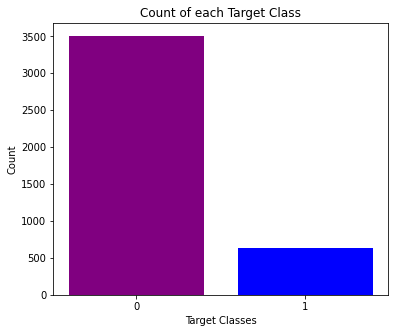

In [ ]:
rcParams['figure.figsize'] = 6,5
plt.bar(df.TenYearCHD.unique(), df.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
print(df.TenYearCHD.value_counts())

A total of 4240 data with 15 columns, 644 observations to be risked to heart disease, and 388 data are missing or invalid.



# **Data Preparation**

Dropping the missing data

0    3505
1     628
Name: TenYearCHD, dtype: int64


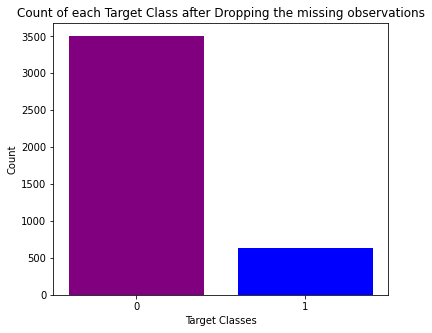

In [ ]:
df_test=df
df_test.dropna(axis=0,inplace=True)
df_test.shape

rcParams['figure.figsize'] = 6,5
plt.bar(df_test.TenYearCHD.unique(), df_test.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class after Dropping the missing observations')
print(df_test.TenYearCHD.value_counts())

Dropping so many observations in this case might cause irrelevance in the training the model. So we impute the data.


# **Imputation and Scaling using Pipeline**

In [ ]:
data_frame = pd.read_csv('CHD_preprocessed.csv')
df = pd.DataFrame(data_frame)
df.drop(['education'], axis = 1, inplace = True)

In [ ]:
df.shape

(4133, 15)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
cols=["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

In [ ]:
X_components=df.columns[:-1]
ddf=df[X_components]
ddf

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4129,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4130,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4131,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0


In [ ]:
pipe1=Pipeline([("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
df1=pipe1.fit_transform(ddf)
df_mean=pd.DataFrame(data=df1[0:,0:],  columns=cols)

pipe2=Pipeline([("imputer",SimpleImputer(strategy="median")),("scaler",StandardScaler())])
df2=pipe1.fit_transform(ddf)
df_median=pd.DataFrame(data=df2[0:,0:],  columns=cols)

pipe3=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),("scaler",StandardScaler())])
df3=pipe1.fit_transform(ddf)
df_most=pd.DataFrame(data=df3[0:,0:],  columns=cols)

#imp1=SimpleImputer(strategy="mean")
#imp2=SimpleImputer(strategy="median")
#imp3=SimpleImputer(strategy="most_frequent")

In [ ]:
df_mean.shape

(4133, 14)

In [ ]:
df_mean

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.157721,-1.233235,-0.989649,-0.763751,-0.188627,-0.078011,-0.672089,-0.162242,-0.948992,-1.194286,-1.077067,0.292457,0.338218,-0.216401
1,-0.863766,-0.415535,-0.989649,-0.763751,-0.188627,-0.078011,-0.672089,-0.162242,0.303745,-0.514866,-0.156658,0.724478,1.583266,-0.260149
2,1.157721,-0.181906,1.010459,0.914524,-0.188627,-0.078011,-0.672089,-0.162242,0.189860,-0.220451,-0.240331,-0.107655,-0.076798,-0.522637
3,-0.863766,1.336681,1.010459,1.753661,-0.188627,-0.078011,1.487898,-0.162242,-0.265681,0.798679,1.014772,0.687658,-0.906829,0.921047
4,-0.863766,-0.415535,1.010459,1.166265,-0.188627,-0.078011,-0.672089,-0.162242,1.100941,-0.107215,0.094363,-0.657501,0.753234,0.133583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1.157721,0.051723,1.010459,-0.679837,-0.188627,-0.078011,1.487898,-0.162242,1.738698,2.112224,0.763751,0.046989,-0.823826,0.177331
4129,1.157721,0.168537,1.010459,2.844540,-0.188627,-0.078011,-0.672089,-0.162242,-0.675667,-0.265746,-0.240331,-1.489634,-0.906829,-0.610133
4130,-0.863766,-0.181906,1.010459,0.914524,-0.188627,-0.078011,-0.672089,-0.162242,0.258191,-0.061920,-0.909720,-0.927515,0.670231,0.177331
4131,-0.863766,-0.649163,1.010459,0.494955,-0.188627,-0.078011,-0.672089,-0.162242,-0.607336,-0.265746,0.345384,-1.624641,0.836238,0.002339


This is the preprocessed data

# Exploratory Analysis

**Histogram**

In [ ]:
from ipywidgets import widgets

feature_desc={'age':'Age of person',
              'cigsPerDay':'No of average ciggarete taken per day',
              'BPMeds':'BPMeds',
              'prevalentStroke':'prevalentStroke',
              'prevalentHype':'prevalentHype',
             'diabetes':'diabetes',
             'totChol':'Total Cholesterol Value Measured',
             'sysBP':'sysBP',
             'diaBP':'diaBP',
             'BMI':'Body Mass Index',
             'heartRate':'Heart Rate',
             'glucose':'Glucose',
             'TenYearCHD':'Ten Year CHD'}

def hist_feature(column):
    df[column].hist(bins=20,facecolor='midnightblue')
    plt.show()
   


dropdown_menu = {v:k for k,v in feature_desc.items()}

widgets.interact(hist_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Age of person': 'age', 'No of average ciggarete…

<function __main__.hist_feature(column)>

# **Correlation Matrix Visualization**

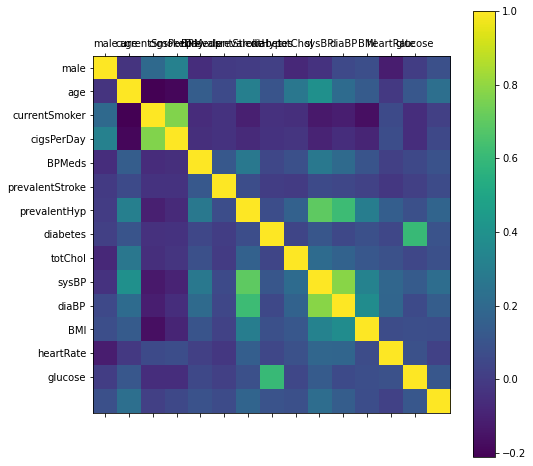

In [ ]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 3,8
plt.matshow(df.corr())
plt.yticks(np.arange(df_mean.shape[1]), df.columns)
plt.xticks(np.arange(df_mean.shape[1]), df.columns)
plt.colorbar()

Text(0.5, 1.0, 'Count of each Target Class')

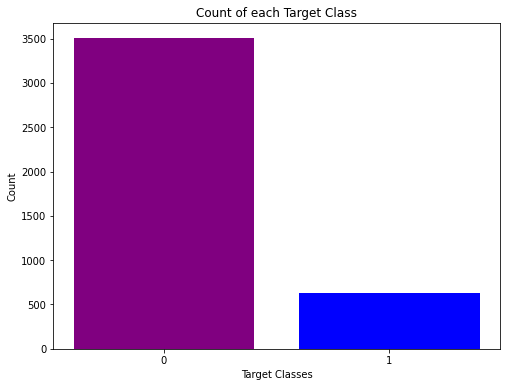

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(df.TenYearCHD.unique(), df.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [ ]:
df_mean.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03,4.133000e+03
mean,-6.017178e-17,-2.544407e-16,-7.564452e-17,1.719194e-18,4.985662e-17,-3.094549e-17,-5.845258e-17,-4.813742e-17,-1.349567e-16,-3.541539e-16,-7.908291e-17,-8.939807e-17,3.094549e-16,2.759306e-16
std,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00,1.000121e+00
min,-8.637662e-01,-2.050935e+00,-9.896495e-01,-7.637512e-01,-1.886268e-01,-7.801081e-02,-6.720889e-01,-1.622416e-01,-2.953370e+00,-2.213416e+00,-2.917885e+00,-2.513232e+00,-2.649896e+00,-1.835077e+00
25%,-8.637662e-01,-8.827920e-01,-9.896495e-01,-7.637512e-01,-1.886268e-01,-7.801081e-02,-6.720889e-01,-1.622416e-01,-6.984442e-01,-6.960450e-01,-6.586989e-01,-6.673196e-01,-6.578198e-01,-4.351407e-01
50%,-8.637662e-01,-6.509156e-02,-9.896495e-01,-7.637512e-01,-1.886268e-01,-7.801081e-02,-6.720889e-01,-1.622416e-01,-6.068732e-02,-1.978038e-01,-7.298407e-02,-9.783606e-02,-7.679753e-02,-8.515670e-02
75%,1.157721e+00,7.526088e-01,1.010459e+00,9.145239e-01,-1.886268e-01,-7.801081e-02,1.487898e+00,-1.622416e-01,5.770696e-01,5.269106e-01,5.545676e-01,5.428329e-01,5.872280e-01,1.335833e-01
max,1.157721e+00,2.388010e+00,1.010459e+00,5.110211e+00,5.301475e+00,1.281874e+01,1.487898e+00,6.163649e+00,8.275706e+00,7.366403e+00,4.989266e+00,7.614738e+00,5.567419e+00,1.365171e+01


# **Conclusion of Exploratory Analysis**


**Out of 3715 observations over 500 observation (Patient) are at the risk of heart disease.** 

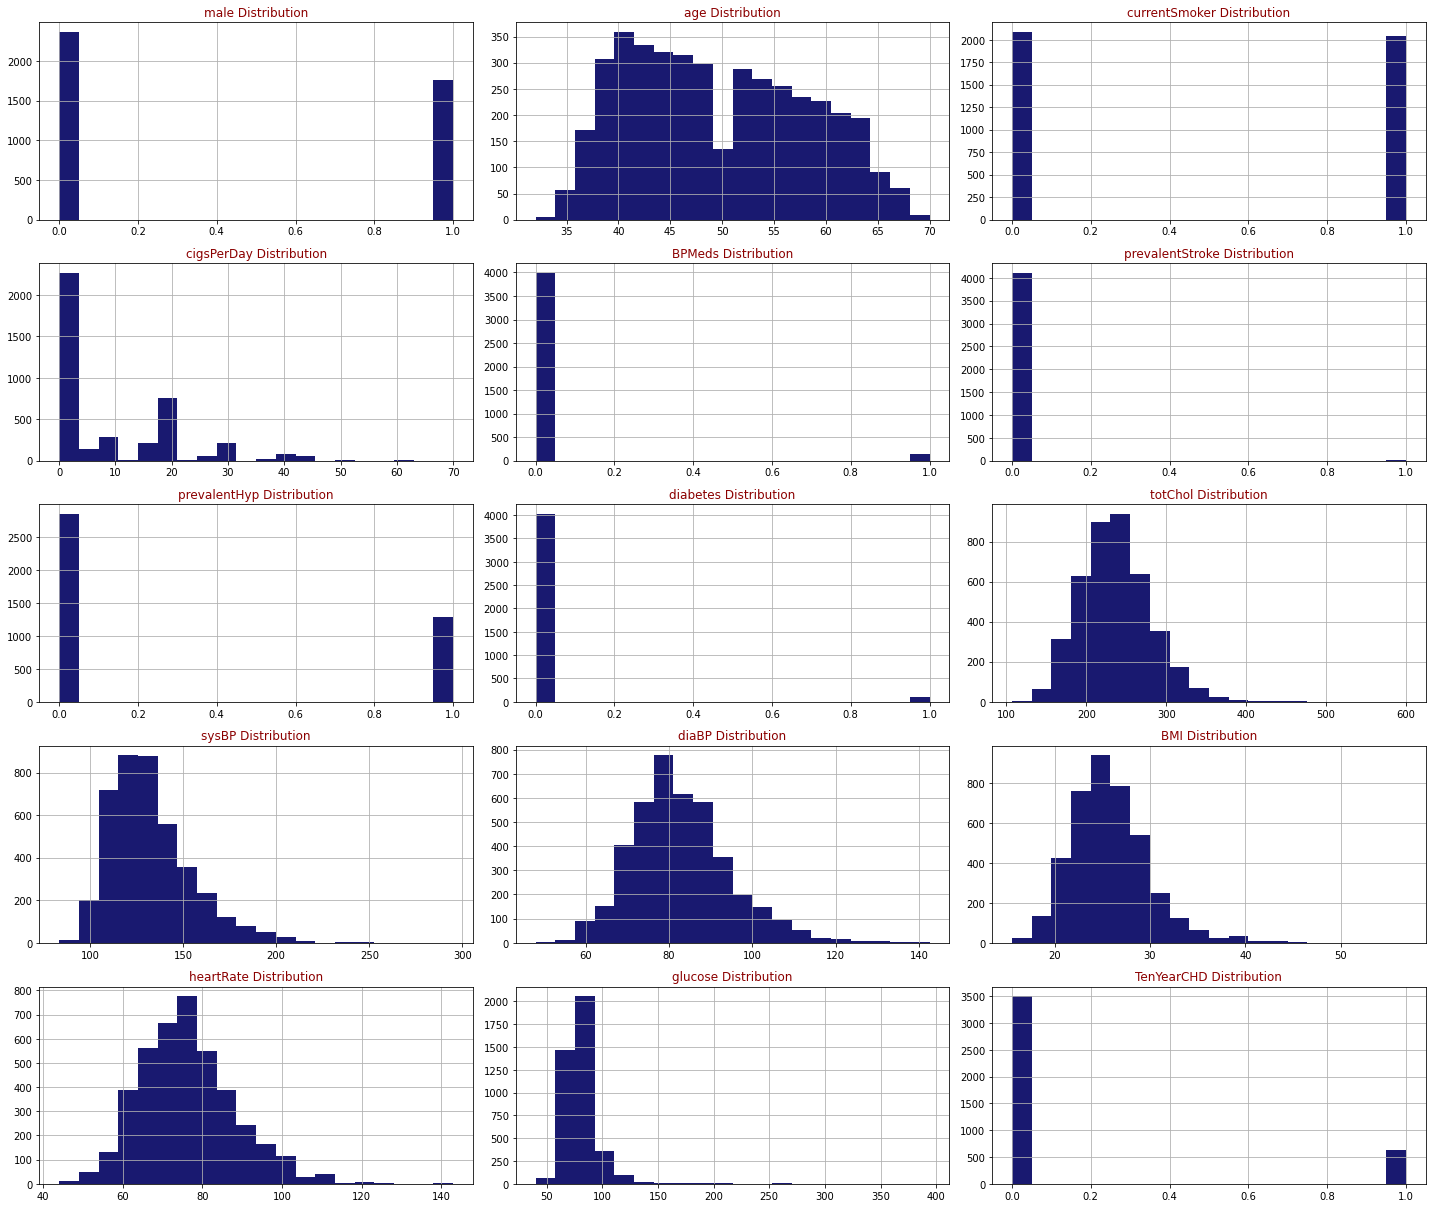

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from statsmodels.tools import add_constant

In [ ]:
df_constant = add_constant(df)
df_constant.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Feature Selection**

 **1**. **Backward** **elimination** **(P-value approach)**

In [ ]:
X1_components=df_mean.columns
X1=df_mean[X1_components]
y1=df.TenYearCHD

X2_components=df_median.columns
X2=df_median[X2_components]
y2=df.TenYearCHD

In [ ]:
column_list=['male','age','currentSmoker','cigsPerDay' ,'BPMeds','prevalentStroke','prevalentHyp' ,'diabetes',  'totChol', 'sysBP',  'diaBP', 'BMI','heartRate','glucose']    

In [ ]:
df_mean.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [ ]:
def feature_selection(data_frame, dependent_variable, column_list):
    while len(column_list)>0:
        model = sm.Logit(dependent_variable, data_frame[column_list])
        result = model.fit(disp = 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            column_list = column_list.drop(largest_pvalue.index)
            
cols = df_mean.columns[:-1]
result1 = feature_selection(df_mean, y1, cols)
print("This is the result using the imputation for mean values")
result1.summary()

This is the result using the imputation for mean values


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4127
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 -0.5694
Time:                        13:44:21   Log-Likelihood:                -2763.6
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1003      0.034      2.980      0.003       0.034       0.166
age                 0.2643      0.035      7.458      0.000       0.195       0.334
cigsPerDay          0.1234      0.034      3.587      0.000       0.056       0.191
prevalentStroke     0.0818      0.039      2.112      0.035       0.006       0.158
diabetes            0.1056      0.035      3.007      0.003       0.037       0.174
sysBP               0.2270      0.036      6.352      0.000       0.157       0.297
===================================================================================
"""

In [ ]:
column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
new=df_mean[column_list]
new

,male,age,cigsPerDay,prevalentStroke,diabetes,sysBP
0,1.157721,-1.233235,-0.763751,-0.078011,-0.162242,-1.194286
1,-0.863766,-0.415535,-0.763751,-0.078011,-0.162242,-0.514866
2,1.157721,-0.181906,0.914524,-0.078011,-0.162242,-0.220451
3,-0.863766,1.336681,1.753661,-0.078011,-0.162242,0.798679
4,-0.863766,-0.415535,1.166265,-0.078011,-0.162242,-0.107215
...,...,...,...,...,...,...
4128,1.157721,0.051723,-0.679837,-0.078011,-0.162242,2.112224
4129,1.157721,0.168537,2.844540,-0.078011,-0.162242,-0.265746
4130,-0.863766,-0.181906,0.914524,-0.078011,-0.162242,-0.061920
4131,-0.863766,-0.649163,0.494955,-0.078011,-0.162242,-0.265746


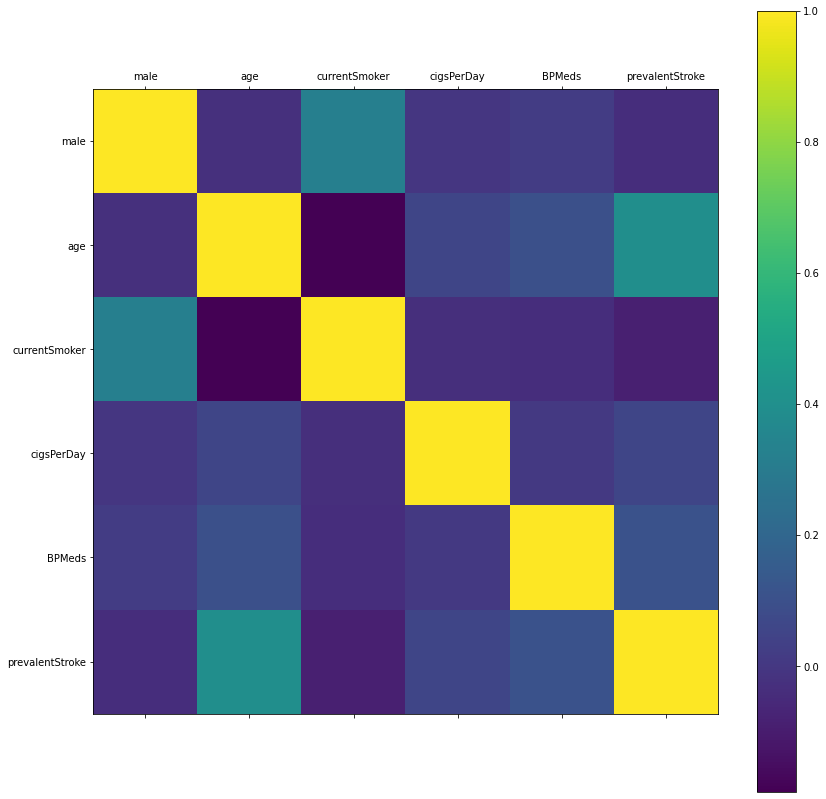

In [ ]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
new=df_mean[column_list]

rcParams['figure.figsize'] = 20, 14
plt.matshow(new.corr())
plt.yticks(np.arange(new.shape[1]), df.columns)
plt.xticks(np.arange(new.shape[1]), df.columns)
plt.colorbar()

In [ ]:
result2 = feature_selection(df_median, y2, cols)
print("This is the result using the imputation for median values")
result2.summary()

This is the result using the imputation for median values


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4127
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 -0.5694
Time:                        13:46:01   Log-Likelihood:                -2763.6
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1003      0.034      2.980      0.003       0.034       0.166
age                 0.2643      0.035      7.458      0.000       0.195       0.334
cigsPerDay          0.1234      0.034      3.587      0.000       0.056       0.191
prevalentStroke     0.0818      0.039      2.112      0.035       0.006       0.158
diabetes            0.1056      0.035      3.007      0.003       0.037       0.174
sysBP               0.2270      0.036      6.352      0.000       0.157       0.297
===================================================================================
"""

# **Without KFold**

In [ ]:
column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
X=df_mean[column_list]
y=df.TenYearCHD

X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log_model.score(X_train,y_train)

0.8569267997580158

In [ ]:
log_model.score(X_test,y_test)

0.8331318016928658

In [ ]:
results=confusion_matrix(y,log_model.predict(X))
results

array([[3473,   32],
       [ 579,   49]])

In [ ]:
classification_report(y_train, log_model.predict(X_train))

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92      2810\n           1       0.66      0.10      0.17       496\n\n    accuracy                           0.86      3306\n   macro avg       0.76      0.54      0.55      3306\nweighted avg       0.83      0.86      0.81      3306\n'

In [ ]:
classification_report(y_test, log_model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91       695\n           1       0.12      0.01      0.01       132\n\n    accuracy                           0.83       827\n   macro avg       0.48      0.50      0.46       827\nweighted avg       0.73      0.83      0.77       827\n'

# **2. Recursive Feature Elimination with Cross Validation**

In [ ]:
df_mean.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator = rfc, step = 1, cv = StratifiedKFold(10), scoring = 'r2',verbose=1)
X_components=df_mean.columns
X=df_mean[X_components]
y=df.TenYearCHD
print(X.shape)
print(y.shape)

rfecv.fit(X, y)

(4133, 14)
(4133,)
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='r2', verbose=1)

In [ ]:
X_components=df_mean.columns
X=df[X_components]
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4129,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4130,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4131,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0


In [ ]:
X.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
# X_components=df_mean.columns
# X=df[X_components]
# dset = df
# print(dset.shape)
# print(X)
# dset['attr'] = X.columns
# dset['importance'] = rfecv.estimator_.feature_importances_

# dset = dset.sort_values(by='importance', ascending=False)


# plt.figure(figsize=(16, 14))
# plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
# plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
# plt.xlabel('Importance', fontsize=14, labelpad=20)
# plt.show()

In [ ]:
# rfecv_unscaled = RFECV(estimator = rfc, 
#                        step = 1, 
#                        cv = StratifiedKFold(10), 
#                        scoring = 'accuracy',verbose=1)
# X_components=df_pre.columns
# X_unscaled=df_pre[X_components]
# y_unscaled=df_pre.TenYearCHD


# rfecv_unscaled.fit(X_unscaled, y_unscaled)

In [ ]:
X_components=df_mean.columns
X=df_mean[X_components]
rfecv_array = [True, True, False,True,False,False,True,False,True,True,True,True,True,True]
res = [i for i, val in enumerate(rfecv_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), 
                                               test_size=0.2, 
                                               random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log_model.score(X_train,y_train)

0.8548094373865699

In [ ]:
log_model.score(X_test,y_test)

0.8573155985489722

In [ ]:
rfecv.estimator_.feature_importances_

array([0.02142946, 0.12765216, 0.01207917, 0.05073409, 0.00739237,
       0.01942763, 0.00636423, 0.12918968, 0.14020839, 0.12400317,
       0.13705599, 0.0996055 , 0.12485815])

In [ ]:
X_components=df.columns[:-1]
X=df[X_components]
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(14, 16))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

ValueError: ignored

In [ ]:
X_components=df.columns[:-1]
X=df[X_components]
y=df.TenYearCHD

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state = 0)
logreg = LogisticRegression(fit_intercept = False)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(fit_intercept=False)

In [ ]:
# Calculating Accuracy of coefficient values
# print(np.where(rfecv.support_ == False)[0])
coefficient_array = [ True,  True, False,  True,  True,  True,  True,  True, False,True, False, False, False, False]
res = [i for i, val in enumerate(coefficient_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)
X

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP
0,1,39,0.0,0.0,0,0,0,106.0
1,0,46,0.0,0.0,0,0,0,121.0
2,1,48,20.0,0.0,0,0,0,127.5
3,0,61,30.0,0.0,0,1,0,150.0
4,0,46,23.0,0.0,0,0,0,130.0
...,...,...,...,...,...,...,...,...
4128,1,50,1.0,0.0,0,1,0,179.0
4129,1,51,43.0,0.0,0,0,0,126.5
4130,0,48,20.0,0.0,0,0,0,131.0
4131,0,44,15.0,0.0,0,0,0,126.5


# **4. Recursive Feature Extraction**

In [ ]:
X_components=df.columns[:-1]
X=df[X_components]
y=df.TenYearCHD
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state = 0)


In [ ]:
predictors = X_train
selector = RFE(logreg, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
order = selector.ranking_
order
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}.{df.columns[i]}")
feature_ranks

['2.currentSmoker',
 '9.sysBP',
 '1.age',
 '10.diaBP',
 '6.prevalentHyp',
 '5.prevalentStroke',
 '4.BPMeds',
 '3.cigsPerDay',
 '14.TenYearCHD',
 '12.heartRate',
 '11.BMI',
 '7.diabetes',
 '8.totChol',
 '13.glucose']

In [ ]:
rfe_array = [True,True,True,True,True,True,True,True,False,False, False, True,True,False]
res = [i for i, val in enumerate(rfe_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)
X

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,BMI,heartRate
0,1,39,0,0.0,0.0,0,0,0,26.97,80.0
1,0,46,0,0.0,0.0,0,0,0,28.73,95.0
2,1,48,1,20.0,0.0,0,0,0,25.34,75.0
3,0,61,1,30.0,0.0,0,1,0,28.58,65.0
4,0,46,1,23.0,0.0,0,0,0,23.10,85.0
...,...,...,...,...,...,...,...,...,...,...
4128,1,50,1,1.0,0.0,0,1,0,25.97,66.0
4129,1,51,1,43.0,0.0,0,0,0,19.71,65.0
4130,0,48,1,20.0,0.0,0,0,0,22.00,84.0
4131,0,44,1,15.0,0.0,0,0,0,19.16,86.0
